# 都道府県地図による塗り分け

In [1]:
# 1. ライブラリの読み込み
import japanmap
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
import pandas as pd
df = pd.read_csv("data/minimum_wage_2025.csv")
df.head()

,都道府県名,2025
0,北海道,1075
1,青森県,1029
2,岩手県,1031
3,宮城県,1038
4,秋田県,1031


In [3]:
data = df["2025"].values
min_data = min(data)
max_data = max(data)
min_data, max_data

(np.int64(1023), np.int64(1226))

In [4]:
cmap = plt.cm.Blues
norm = plt.Normalize(vmin=min_data, vmax=max_data)

def color_scale(x):
    # xの値をRGB値に変換
    return cmap(norm(x), bytes=True)[:3]

# 都道府県ごとに辞書化
pref_color_dict = {
    pref: color_scale(val) for pref, val in zip(df["都道府県名"], df["2025"])
}

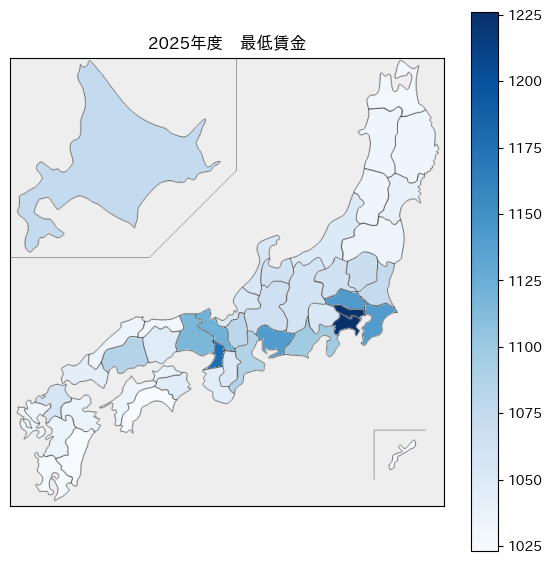

In [5]:
plt.figure(figsize=(7,7))
ax = plt.gca()  # 現在の軸を取得
plt.imshow(japanmap.picture(pref_color_dict))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm, ax=ax)  # カラーバー表示
plt.title("2025年度　最低賃金")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

### コロプレスマップで上位5を別の色に

In [ ]:
top5 = df.sort_values("2025", ascending=False).head(5)

# 変更したい県のリストをループで更新
for pref in top5.index:
    pref_color_dict[pref] = "yellow"

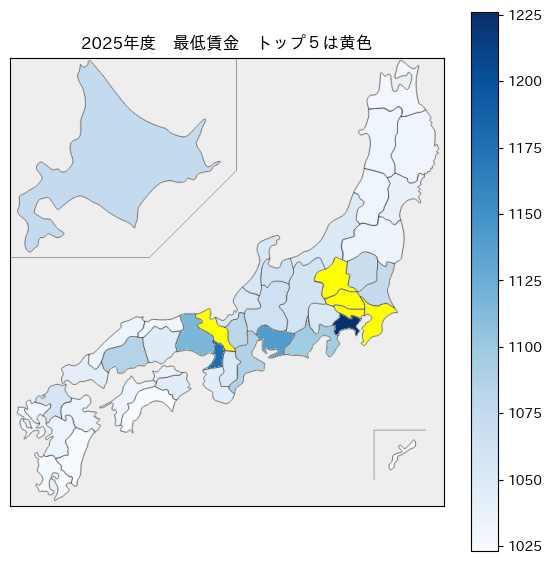

In [ ]:
plt.figure(figsize=(7,7))
ax = plt.gca()  # 現在の軸を取得
plt.imshow(japanmap.picture(pref_color_dict))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm, ax=ax)  # axを明示的に指定
plt.title("2025年度　最低賃金　トップ５は黄色")
ax.set_xticks([])
ax.set_yticks([])
plt.show()